<a href="https://colab.research.google.com/github/isinghal24/research/blob/main/Horizon_Research_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import RocCurveDisplay, confusion_matrix, roc_auc_score, classification_report, average_precision_score, PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

df = pd.read_csv("sample_data/cicddos2019_dataset.csv",index_col=None)
dftop=df.head()
dftop

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,0,17,216631,6,0,2088.0,0.0,393.0,321.0,348.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
1,1,17,2,2,0,802.0,0.0,401.0,401.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
2,2,17,48,2,0,766.0,0.0,383.0,383.0,383.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
3,3,17,107319,4,0,1398.0,0.0,369.0,330.0,349.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
4,4,17,107271,4,0,1438.0,0.0,389.0,330.0,359.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack


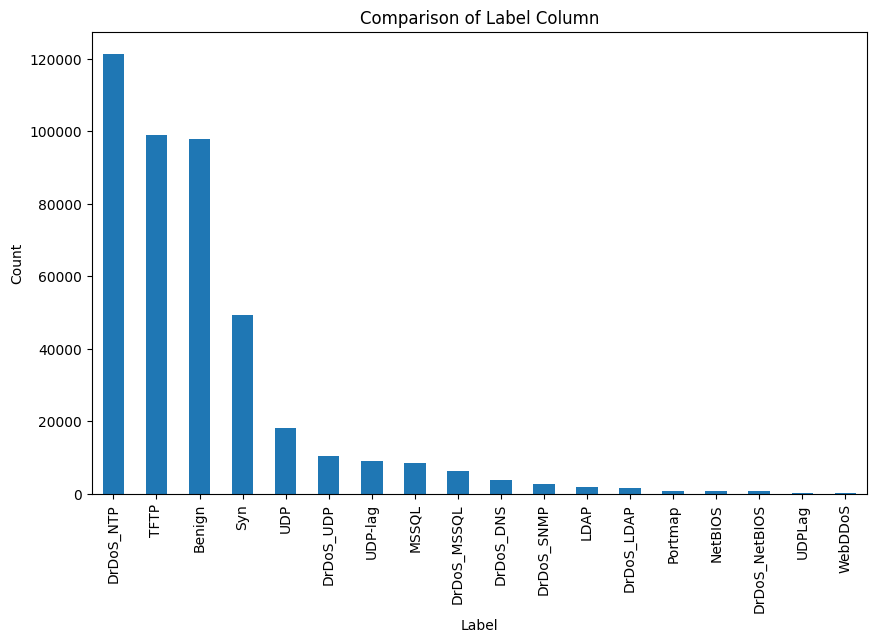

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = df['Label'].value_counts()

# Create a bar plot to visualize the label counts
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Comparison of Label Column')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

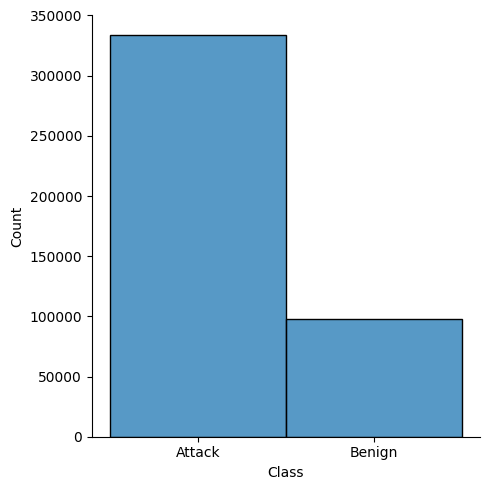

In [ ]:
sns.displot(df, x='Class')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431371 entries, 0 to 431370
Data columns (total 79 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                431371 non-null  int64  
 1   Protocol                  431371 non-null  int64  
 2   Flow Duration             431371 non-null  int64  
 3   Total Fwd Packets         431371 non-null  int64  
 4   Total Backward Packets    431371 non-null  int64  
 5   Fwd Packets Length Total  431371 non-null  float64
 6   Bwd Packets Length Total  431371 non-null  float64
 7   Fwd Packet Length Max     431371 non-null  float64
 8   Fwd Packet Length Min     431371 non-null  float64
 9   Fwd Packet Length Mean    431371 non-null  float64
 10  Fwd Packet Length Std     431371 non-null  float64
 11  Bwd Packet Length Max     431371 non-null  float64
 12  Bwd Packet Length Min     431371 non-null  float64
 13  Bwd Packet Length Mean    431371 non-null  f

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,0,17,216631,6,0,2088.0,0.0,393.0,321.0,348.0,...,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,17,2,2,0,802.0,0.0,401.0,401.0,401.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,17,48,2,0,766.0,0.0,383.0,383.0,383.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,17,107319,4,0,1398.0,0.0,369.0,330.0,349.5,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,17,107271,4,0,1438.0,0.0,389.0,330.0,359.5,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


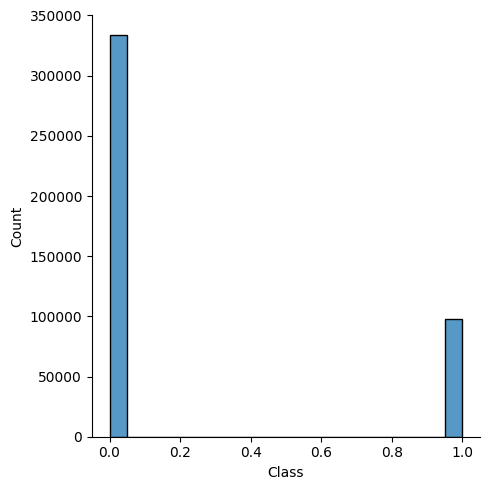

In [ ]:
df = df.drop('Label' , axis = 1)
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])
X = df.drop('Class' , axis = 1)
y = df['Class']
df.info()
RUS = RandomUnderSampler(random_state=42)
X_rus, y_rus = RUS.fit_resample(X,y)
print(y_rus.value_counts())
sns.displot(df, x='Class')
df.head()

In [ ]:
scaler = StandardScaler()
scaler.fit(X_rus)
df_scaled = scaler.transform(X_rus)



In [ ]:
pca = PCA()
pca.fit(df_scaled)

PCA()

In [ ]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance_ratio)
n_components_90 = np.argmax(cumulative_variance_ratio >= 0.90) + 1

[0.21309164 0.34082265 0.43792986 0.51546533 0.5616709  0.60484098
 0.64187187 0.67333959 0.70188822 0.73041778 0.75593923 0.78051708
 0.80098399 0.81916731 0.83574027 0.85164015 0.86669064 0.88153603
 0.89598294 0.90943421 0.92260452 0.93473196 0.94461188 0.95331601
 0.96114583 0.96812966 0.97395386 0.97824761 0.98247836 0.98562604
 0.98857344 0.99092899 0.99217125 0.99326935 0.99426679 0.99519707
 0.99598487 0.99672319 0.99726835 0.99773846 0.99814041 0.99850303
 0.99882737 0.99912177 0.9993269  0.99948115 0.99959584 0.99967835
 0.99975022 0.99981378 0.99986935 0.99990671 0.9999364  0.9999654
 0.99998307 0.99999139 0.99999792 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


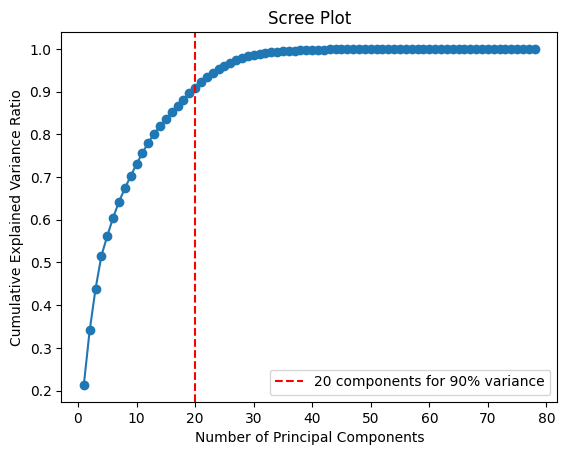

In [ ]:
plt.plot(np.arange(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.axvline(x=n_components_90, color='r', linestyle='--', label=f'{n_components_90} components for 90% variance')
plt.legend()
plt.show()

In [ ]:
pca = PCA(n_components=n_components_90)
X_reduced = pca.fit_transform(df_scaled)
print(X_reduced)
print(X_reduced.shape)

[[ 5.18736503 -2.33017137 -2.09680264 ... -0.41053636  0.01019559
  -0.08925109]
 [-1.67038484  0.71746798 -0.72624871 ...  0.38545752  0.24841542
   0.77002965]
 [-1.49458021  1.81760184 -1.9400727  ...  0.19720219  0.14810357
   0.41372778]
 ...
 [-0.8799405  -2.99392186  2.25296936 ... -0.86286436 -0.78770536
  -1.27842755]
 [-1.30630051 -1.35810741  1.15284338 ... -0.3416877  -0.11523002
  -0.73810985]
 [ 1.65561731  2.6365055   3.53423665 ... -0.39857476  0.38427546
  -0.79322502]]
(195662, 20)


## **DIVIDER**

Total Variance: 
0.9094340619064993


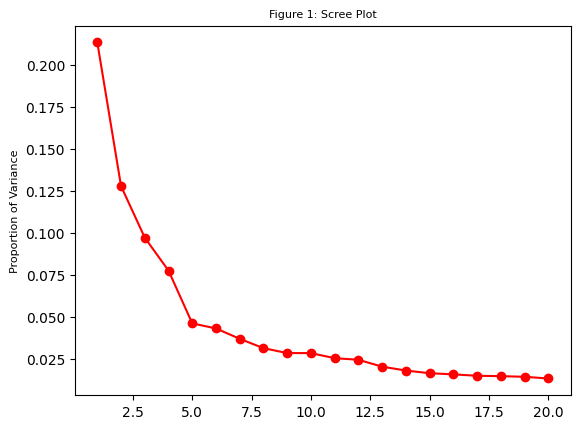

In [ ]:
prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_
print("Total Variance: ")
print(sum(pca.explained_variance_ratio_))
PC_numbers = np.arange(pca.n_components_) + 1

plt.plot(PC_numbers,
         prop_var,
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_rus, test_size=0.3, random_state=42)

In [ ]:

from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

models = {"Logistic Regression": LogisticRegression(max_iter=1000), "Random Forest": RandomForestClassifier(),
         "KNN": KNeighborsClassifier(), "AdaBoost": AdaBoostClassifier(), "Decisiontree": DecisionTreeClassifier() }

cv = KFold(n_splits=10)
import time

def fit_and_score(models, X_train, X_test, y_train, y_test):
    model_scores = {}
    model_roc_auc_scores = {}
    model_roc_curves = {}
    model_time = {}
    for name, model in models.items():
        start = time.process_time()
        # fit a model
        model.fit(X_train, y_train)
        model_time[name] = time.process_time() - start
        scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
        model_roc_auc_scores[name] = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
        model_roc_curves[name] = roc_curve(y_test, model.predict_proba(X_test)[:,1])
        model_scores[name] = model.score(X_test, y_test)
    return model_scores, model_roc_auc_scores, model_roc_curves, scores, model_time

In [ ]:
model_scores, model_roc_auc_scores, model_roc_curves, scores, model_time = fit_and_score(models, X_train, X_test, y_train, y_test)
print("ACCURACIES : ")
model_scores

ACCURACIES : 


{'Logistic Regression': 0.9932537181212627,
 'Random Forest': 0.998722295098724,
 'KNN': 0.9980749246154108,
 'AdaBoost': 0.9935603672975689,
 'Decisiontree': 0.9972060852825432}

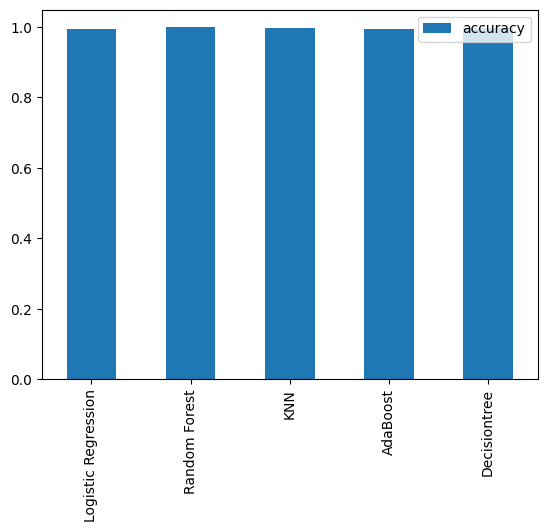

In [ ]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

In [ ]:
print("Mean score of %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Mean score of 1.00 with a standard deviation of 0.00


In [ ]:
print("PRECISION : ")
model_precision_scores

In [ ]:
print("RECALL : ")
model_recall_scores

In [ ]:
print("ROC AUC SCORES : ")
model_roc_auc_scores


ROC AUC SCORES : 


{'Logistic Regression': 0.9984469582006643,
 'Random Forest': 0.9999201522850716,
 'KNN': 0.9992574491633369,
 'AdaBoost': 0.9993499312050862,
 'Decisiontree': 0.9972240620532563}

In [ ]:
print("Time : ")
model_time

Time : 


{'Logistic Regression': 4.72800411999998,
 'Random Forest': 85.66896788499997,
 'KNN': 0.011422481999943557,
 'AdaBoost': 35.612797719000014,
 'Decisiontree': 6.894349242999965}

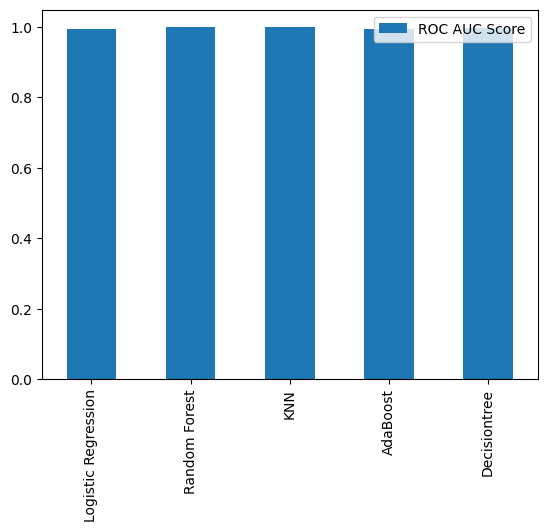

In [ ]:
model_compare = pd.DataFrame(model_scores, index=['ROC AUC Score'])
model_compare.T.plot.bar();

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9987052590333737

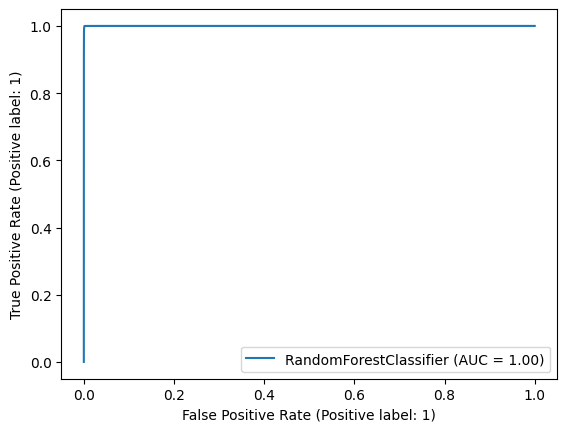

In [ ]:
RocCurveDisplay.from_estimator(clf, X_test, y_test)

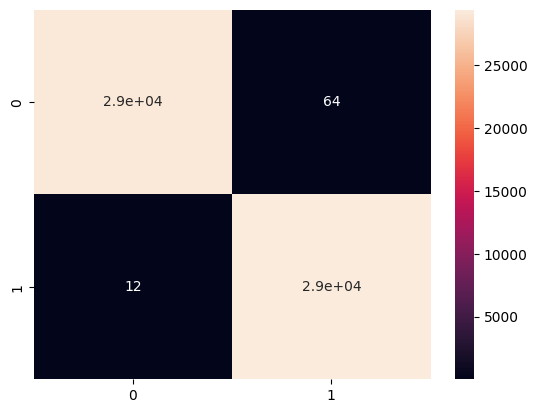

In [ ]:
y_preds = clf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_mat, annot=True);

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29251
           1       1.00      1.00      1.00     29448

    accuracy                           1.00     58699
   macro avg       1.00      1.00      1.00     58699
weighted avg       1.00      1.00      1.00     58699



In [ ]:
average_precision = average_precision_score(y_test, clf.predict_proba(X_test)[:,1])
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 1.00


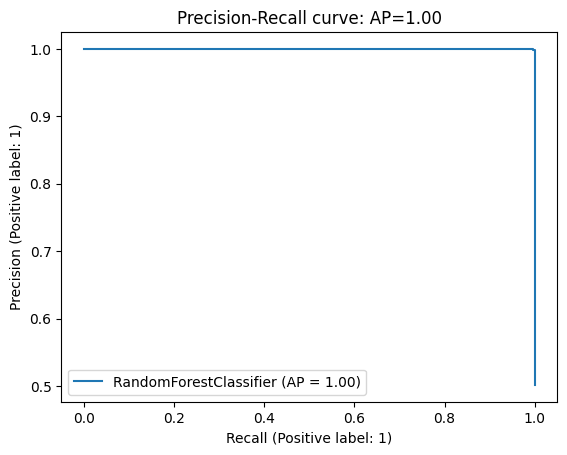

In [ ]:
disp = PrecisionRecallDisplay.from_estimator(clf, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision));

In [ ]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9932537181212627

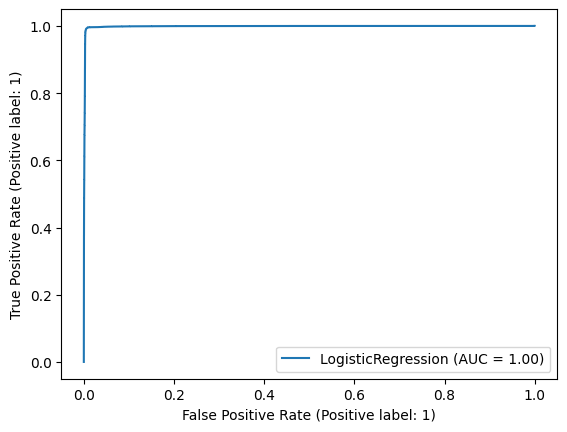

In [ ]:
RocCurveDisplay.from_estimator(clf, X_test, y_test)

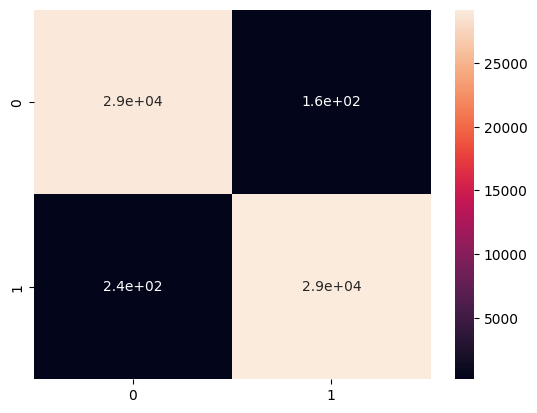

In [ ]:
y_preds = clf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_mat, annot=True);

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     29251
           1       0.99      0.99      0.99     29448

    accuracy                           0.99     58699
   macro avg       0.99      0.99      0.99     58699
weighted avg       0.99      0.99      0.99     58699



In [ ]:
average_precision = average_precision_score(y_test, clf.predict_proba(X_test)[:,1])
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 1.00


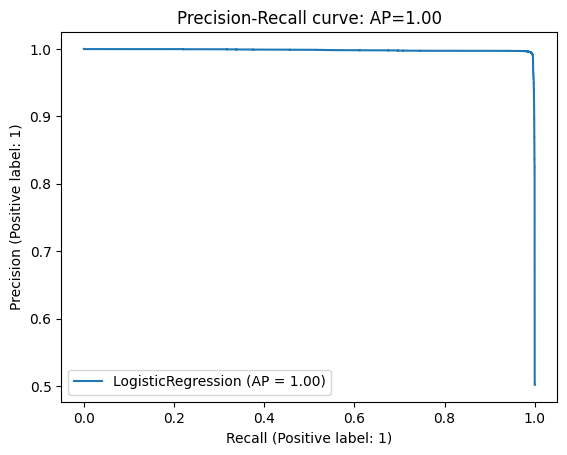

In [ ]:
disp = PrecisionRecallDisplay.from_estimator(clf, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision));

In [ ]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9980749246154108

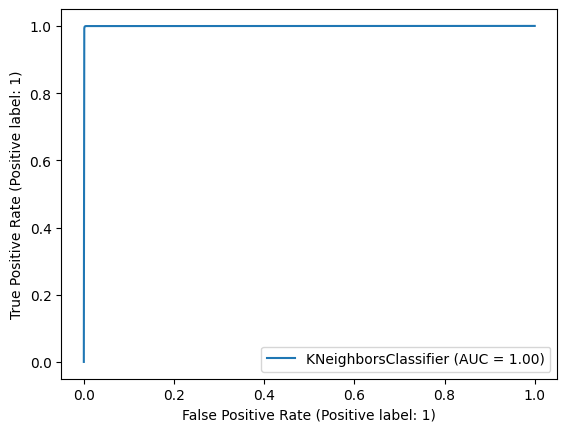

In [ ]:
RocCurveDisplay.from_estimator(clf, X_test, y_test)

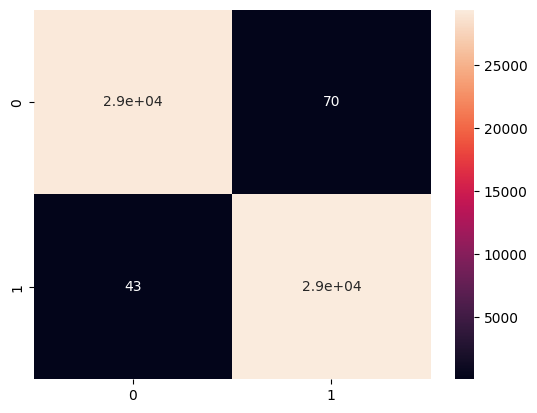

In [ ]:
y_preds = clf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_mat, annot=True);

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29251
           1       1.00      1.00      1.00     29448

    accuracy                           1.00     58699
   macro avg       1.00      1.00      1.00     58699
weighted avg       1.00      1.00      1.00     58699



In [ ]:
average_precision = average_precision_score(y_test, clf.predict_proba(X_test)[:,1])
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 1.00


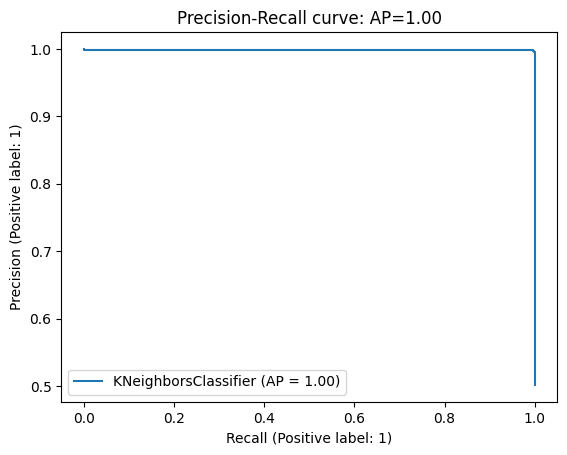

In [ ]:
disp = PrecisionRecallDisplay.from_estimator(clf, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision));

In [ ]:
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9935262951668683

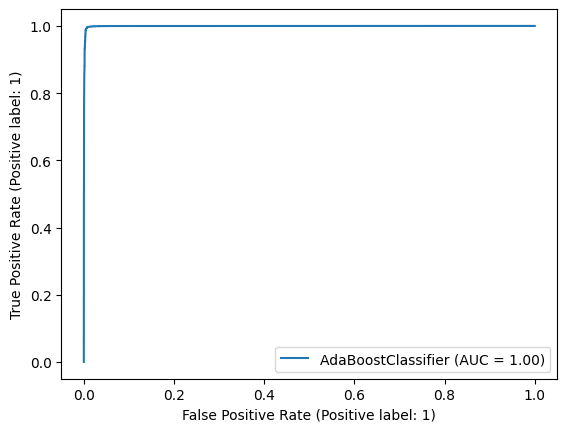

In [ ]:
RocCurveDisplay.from_estimator(clf, X_test, y_test)

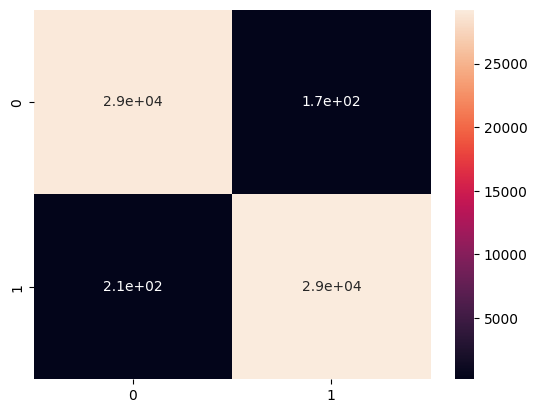

In [ ]:
y_preds = clf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_mat, annot=True);

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     29251
           1       0.99      0.99      0.99     29448

    accuracy                           0.99     58699
   macro avg       0.99      0.99      0.99     58699
weighted avg       0.99      0.99      0.99     58699



In [ ]:
average_precision = average_precision_score(y_test, clf.predict_proba(X_test)[:,1])
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 1.00


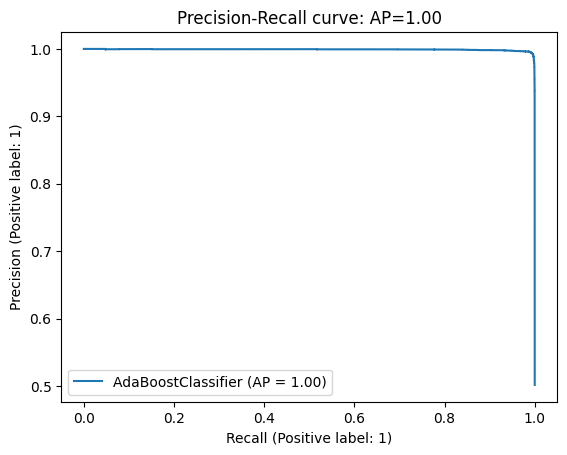

In [ ]:
disp = PrecisionRecallDisplay.from_estimator(clf, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision));

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9970697967597404

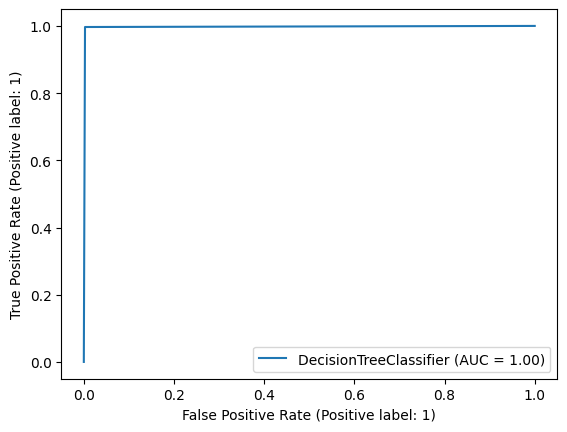

In [ ]:
RocCurveDisplay.from_estimator(clf, X_test, y_test)

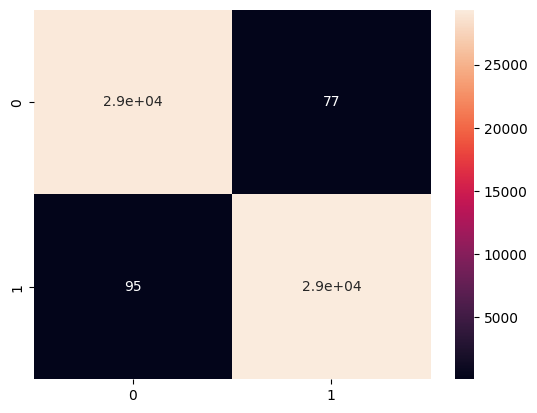

In [ ]:
y_preds = clf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_mat, annot=True);

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29251
           1       1.00      1.00      1.00     29448

    accuracy                           1.00     58699
   macro avg       1.00      1.00      1.00     58699
weighted avg       1.00      1.00      1.00     58699



In [ ]:
average_precision = average_precision_score(y_test, clf.predict_proba(X_test)[:,1])
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 1.00


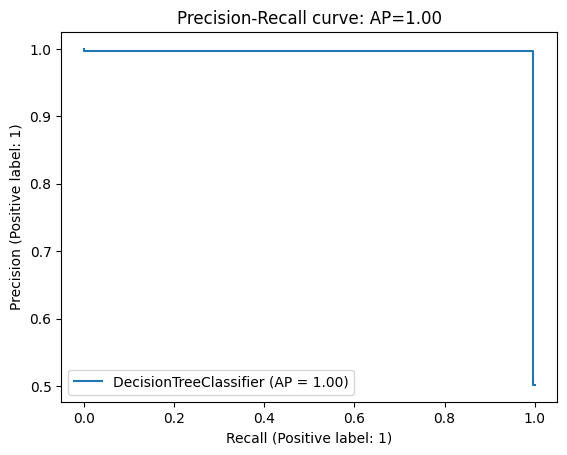

In [ ]:
disp = PrecisionRecallDisplay.from_estimator(clf, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision));